
 Curso : Ciência de Dados




Alunas: Camila Perazzo e Sara Coutinho. 

Atividade de Visualização de Dados - 12/05/2023. 

Diário de Bordo da atividade: 

* 28/04/23:17:30 às 18:00 horas - Entendimento do Contexto.

* 7/5/23:17:30 às 18:00 horas - Entendimento dos dados.

* 8/5/23: 10:30 às 11:40 horas -  Desenvolvimento do algoritmo e dos gráficos.  
* 12/5/23 :11:00 às 12:00, 15 às 16:00 , 21 às 23 horas - Revisão e adição de mais gráficos e ajustes das análises.  


Com base nas etapas de um projeto com metodologia KDD, seguimos as seguintes etapas: 


*   Entendimento do Negócio
*   Coleta e Preparação dos Dados
*   Aplicação da Arvóre 
*   Análise exploratória do ramo escolhido



O notebook esta dividido nas seguintes seções: 

1) Coleta dos dados e Aplicação da Arvore

2) Escolha do ramo e plotagem dos gráficos.

3) Análises sobre as amostras obtidas



# 🎲 Coleta dos dados e Aplicação da Árvore

Como os dados trabalhados do dataset penguins.

In [ ]:
#---Preparando o Ambiente

#imports
import pandas as pd #dataframe 
import matplotlib.pyplot as plt

#Importando o arquivo de dados 
df = pd.read_csv('/content/penguins.csv')

#Visualizando amostra do conjunto de dados
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


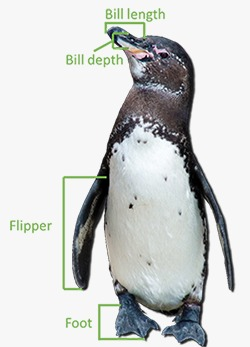

Fonte: https://public.tableau.com/views/PalmerPenguin_makeovermonday/Dashboard1?%3Aembed=y&%3AshowVizHome=no&%3Adisplay_count=y&%3Adisplay_static_image=y&%3AbootstrapWhenNotified=true&%3Alanguage=en&%3Amobile=true&:embed=y&:showVizHome=n&:apiID=host0


In [ ]:
#---Analisando o conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.shape

(344, 7)

In [ ]:
#presença de dados nulos 
print("Dados nulos: \n")
print(df.isnull().sum())

#presença de dados duplicados
print("\n Dados duplicados: ")
print(df.duplicated().sum())

Dados nulos: 

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

 Dados duplicados: 
0


Os valores faltantes são de categorias numéricas e 1 é categoria nominal. 

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

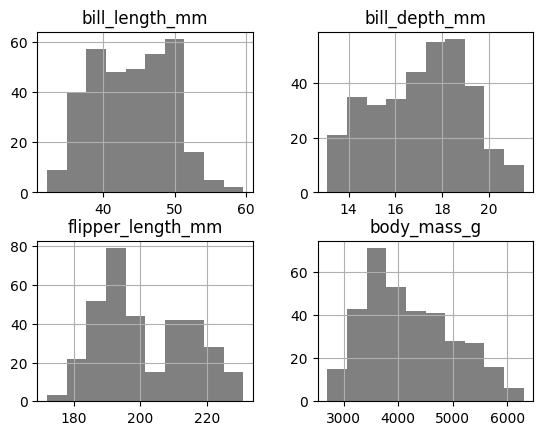

In [ ]:
#Histograma das categorias com dados nulos 
df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].hist(color='gray')

<Axes: xlabel='sex'>

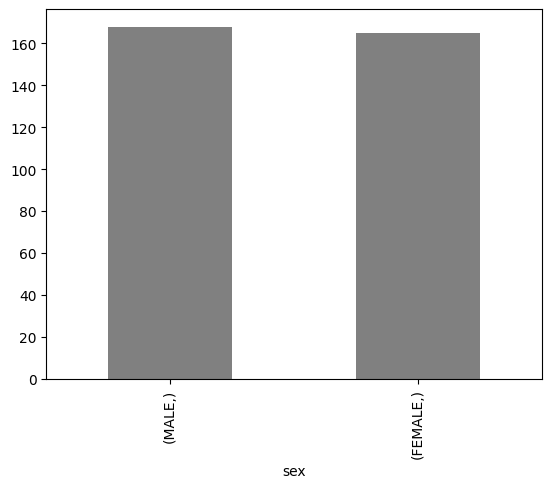

In [ ]:
df[['sex']].value_counts().plot(kind='bar',color='gray')

De acordo com as distribuições das variáveis, admitiu-se as seguintes abordagens para preenchimento de valores nulos:
* bill_length_mm : distribuição se assemelha a normal, adotou-se a interpolação linear.
* bill_deptth_mm : distribuição se assemelha a normal, adotou-se a interpolação linear.  
* flipper_length_mm : distribuição assimétrica, adotou-se o valor anterior ffill para preencher com o valor posterior pois a distribuição está deslocada à esquerda.
* body_mass_g : mesmo procedimento que flipper_legth_mm.  
* sex: distribuição quase igualitária, adotou-se o mais frequente.





In [ ]:
#preenchimento de valores ausentes 
df['bill_length_mm'] = df['bill_length_mm'].interpolate(method='linear')
df['bill_depth_mm'] = df['bill_depth_mm'].interpolate(method='linear')
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(method='ffill')
df['body_mass_g'] = df['body_mass_g'].fillna(method='ffill')
df['sex'] = df['sex'].fillna('MALE')

In [ ]:
#verificaçao se todos os valores nulos foram tratados
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Após essa transformação, como não tem valores duplicados, foi feita a transformação de variáveis categóricas para numéricas para serem imputadas mais facilmente no algoritmo.


In [ ]:
#transformaçao de valores 
print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


Como species já é a variável target do trabalho, serão transformadas apenas as variáveis island e sex.




In [ ]:
%%capture
#transformaçao island
transformation1 = {'Biscoe':1,'Dream':2,'Torgersen':3}
df['island'] = df['island'].map(transformation1)

#transformaçao sex
transformation2 = {'MALE':1,'FEMALE':2}
df['sex'] = df['sex'].map(transformation2)

In [ ]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,3,39.1,18.70,181.0,3750.0,1
1,Adelie,3,39.5,17.40,186.0,3800.0,2
2,Adelie,3,40.3,18.00,195.0,3250.0,2
3,Adelie,3,38.5,18.65,195.0,3250.0,1
4,Adelie,3,36.7,19.30,193.0,3450.0,2


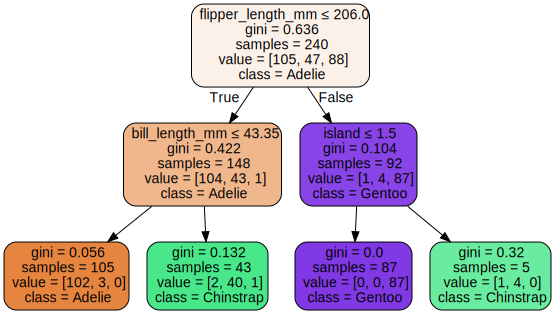

In [ ]:
#---Construindo a arvore 

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier,export_text 
# Import train_test_split function
from sklearn.model_selection import train_test_split 
from sklearn import metrics, tree 
import graphviz 

#conjuntos de treino e teste
train, test = train_test_split(df, test_size=0.3, random_state=1) 
X_train = train.drop(columns=['species'])
X_test = test.drop(columns=['species'])
y_train = train['species']
y_test = test['species']

#classificador 
clf = DecisionTreeClassifier(random_state=0, max_depth=2) 
clf = clf.fit(X_train,y_train)

#plot da arvore
feature_names = df.drop(columns=['species']).columns
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(feature_names),class_names=list(df['species'].unique()), 
                                filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
#graph.render("df") 
graph 

In [ ]:
#verificando os ramos
r = export_text(clf, feature_names=list(feature_names))
print(r)

|--- flipper_length_mm <= 206.00
|   |--- bill_length_mm <= 43.35
|   |   |--- class: Adelie
|   |--- bill_length_mm >  43.35
|   |   |--- class: Chinstrap
|--- flipper_length_mm >  206.00
|   |--- island <= 1.50
|   |   |--- class: Gentoo
|   |--- island >  1.50
|   |   |--- class: Chinstrap



# 🎲 Escolha do Ramo e plotagem dos Gráficos. 

Observa-se que a árvore faz divisão dos seus ramos a partir da variável flipper_lenght_mm, o que corresponde ao comprimento do tronco dos pinguins. Por isso, quanto maior, maior tende a ser o pinguim. Provavelmente esse é um tipo de característica bem diferente entre espécies. Por isso esse foi o nó inicial.  


Em seguida, alguns outros ramos dos pinguins menores consideraram o bill_lenght_mm para divisão entre grupos de espécies Adelie e Chinstrap.


Já do grupo que tem maior altura, a divisão ocorreu entre as espécies Gentoo e Chinstrap de acordo com a ilha em que se encontravam.


Como um dos grupos facilmente identificáveis e distinguíveis dos demais pelo comprimento do tronco e ilha foi o Gentoo, foi selecionado o ramo do qual são identificados pinguins dessa espécie.


Dentre os ramos escolheu o ramo que aparece com a cor roxa na ilustração da árvore. Por isso foi o :
* *flipper_length_mm* >  206.00 - *island* <= 1.50 - *class*: Gentoo


Pelas transformações feitas nas variáveis categóricas anteriormente, o island menor que 1,5 corresponde apenas ao Biscoe que vale 1. Os demais Dream e Torgersen valem 2 e 3 e são maiores que 1,5.




|--- **flipper_length_mm** >  206.00

|   |--- **island** <= 1.50

|   |   |--- **class**: Gentoo


Pelo ramo, a classe é Gentoo e estão na ilha Biscoe. Nos próximos passos são ilustrados gráficos explorando as características desse grupo selecionado pelo ramo. 


In [ ]:
#filtrando dataframe para as condiçoes encontradas
amostra = df[(df.flipper_length_mm > 206.00) & (df.island<=1.50) & (df.species=='Gentoo')] 
amostra.shape

(123, 7)

Ao todo a amostra tem 123 registros de penguins.

In [ ]:
%%capture
#transformando a amostra
transformation3 = {1:'Biscoe'}
amostra['island'] = amostra['island'].map(transformation3)
#transformaçao sex
transformation4 = {1:'MALE',2:'FEMALE'}
amostra['sex'] = amostra['sex'].map(transformation4)

In [ ]:
#visualizando a amostra
amostra.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE


In [ ]:
import seaborn as sb

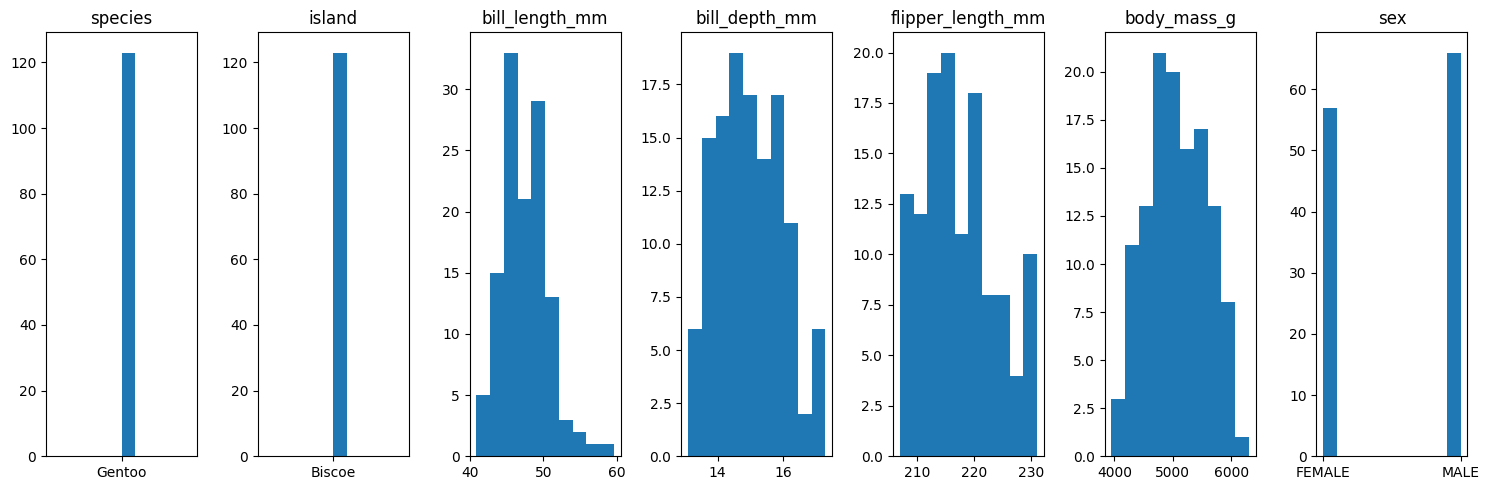

In [ ]:

fig, axs = plt.subplots(nrows=1, ncols=len(amostra.columns), figsize=(15, 5))

for i, col in enumerate(amostra.columns):
    axs[i].hist(amostra[col])
    axs[i].set_title(col)

plt.tight_layout()

plt.show()

Por esses gráficos percebe-se que na amostra as categorias species e island só tem um tipo que é Gentoo e Biscoe, respectivamente.
As demais variáveis possuem uma distribuição similar a normal, contudo a bill_lenght_mm apresenta uma assimetria à esquerda.


<Axes: >

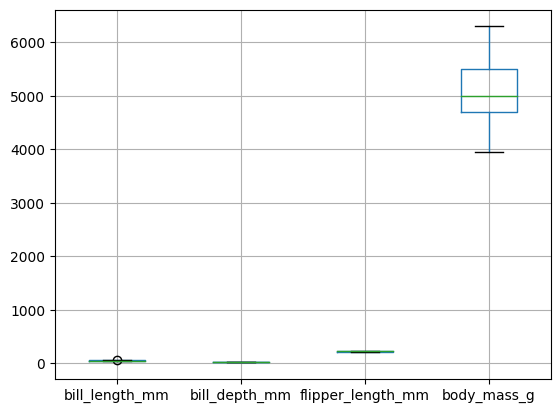

In [ ]:
amostra[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']].boxplot()

Na amostra os valores da variável body_mass_g são bem maiores que os demais. Além disso, um deles apresenta um outlier. A seguir os gráficos de boxplot separados para cada uma das variáveis.

Text(0, 0.5, 'Valor')

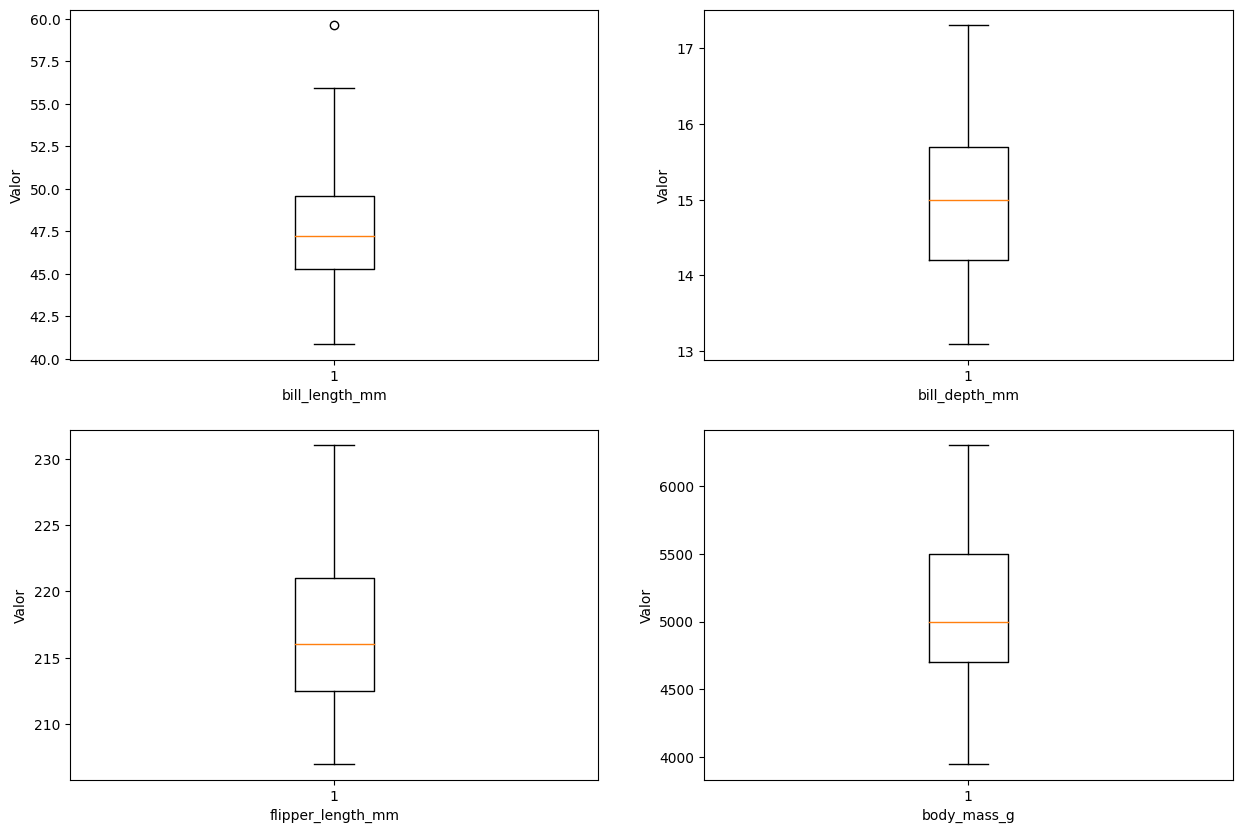

In [ ]:
# Create four polar axes and access them through the returned array
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))#,gridspec_kw={'width_ratios': [3, 3],'height_ratios': [3, 3],'wspace': 0.4,'hspace': 0.4}) 
#---D1
#plt.style.use("fivethirtyeight")
ax[0][0].boxplot(amostra[['bill_length_mm']])
ax[0][1].boxplot(amostra[['bill_depth_mm']])
ax[1][0].boxplot(amostra[['flipper_length_mm']])
ax[1][1].boxplot(amostra[['body_mass_g']])
ax[0][0].set_xlabel('bill_length_mm', color = 'black') 
ax[0][1].set_xlabel('bill_depth_mm', color = 'black') 
ax[1][0].set_xlabel('flipper_length_mm', color = 'black') 
ax[1][1].set_xlabel('body_mass_g', color = 'black') 
ax[0][0].set_ylabel('Valor', color = 'black') 
ax[0][1].set_ylabel('Valor', color = 'black') 
ax[1][0].set_ylabel('Valor', color = 'black') 
ax[1][1].set_ylabel('Valor', color = 'black') 


De fato, a variável bill_length_mm apresenta um outlier. Isso quer dizer que dentro dessa amostra existe um registro de pinguim que possue o comprimento diferente dos demais, correspondendo a um valor maior que 57,5.

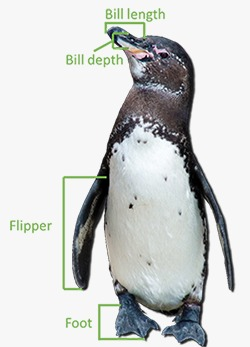

Fonte: https://public.tableau.com/views/PalmerPenguin_makeovermonday/Dashboard1?%3Aembed=y&%3AshowVizHome=no&%3Adisplay_count=y&%3Adisplay_static_image=y&%3AbootstrapWhenNotified=true&%3Alanguage=en&%3Amobile=true&:embed=y&:showVizHome=n&:apiID=host0

In [ ]:
amostra[(amostra.bill_length_mm >= 57.5)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE


Observa-se que para esse registro a profundidade relatada é próxima ao limite superior do boxplot, assim como o body_mass_g. Compreende-se que apesar do pinguim ter uma altura superior ao limite máximo observado pelos demais, as demais medidas dele sao próximas ao limite superior, o que faz entender que essa especie dessa ilha pode atingir um crescimento até maior que o esperado, notando que foi um pinguim registrado como MALE na variável sex  que atingiu isso.

In [ ]:
from  matplotlib.colors import LinearSegmentedColormap

<Axes: >

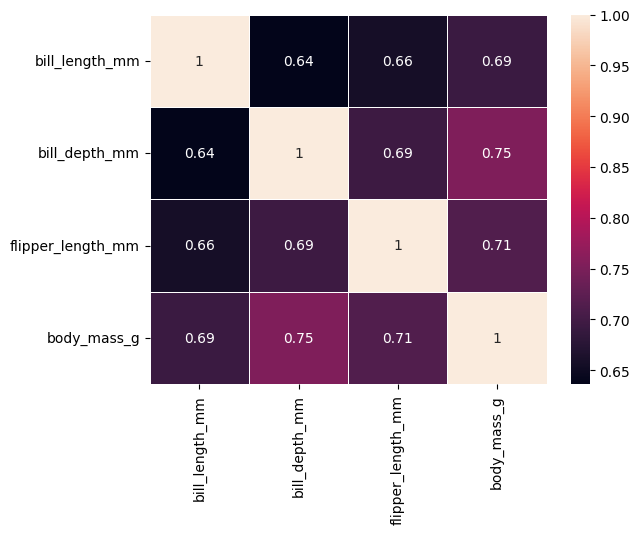

In [ ]:
sb.heatmap(amostra[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']].corr('spearman'),annot=True,linewidths=.6)

Observa-se que de fato a correlação entre as variáveis é moderada a forte. Por isso, conclui-se que os pinguins de sex = MALE da espécie Gentoo na ilha Biscoe podem chegar a alcançar uma altura maior e obviamente terão valores maiores para as demais variáveis medidas.



Text(0.5, 1.0, 'Divisão da amostra pela categoria Sex')

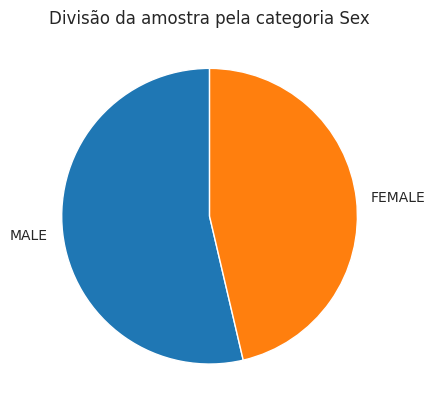

In [ ]:
plt.pie(amostra['sex'].value_counts(),labels=['MALE','FEMALE'],startangle=90)
plt.title("Divisão da amostra pela categoria Sex")

In [ ]:
amostra['sex'].value_counts()

MALE      66
FEMALE    57
Name: sex, dtype: int64

Observa-se que existem um pouco mais de pinguins com sex = MALE na amostra. Ao todo sao 66 com variável sex = MALE e 57 com variável sex = FEMALE. Contudo, aparecem quantidades consideráveis quase equilibradas para os 2 na amostra.

In [ ]:
import plotly.express as px
import pandas as pd

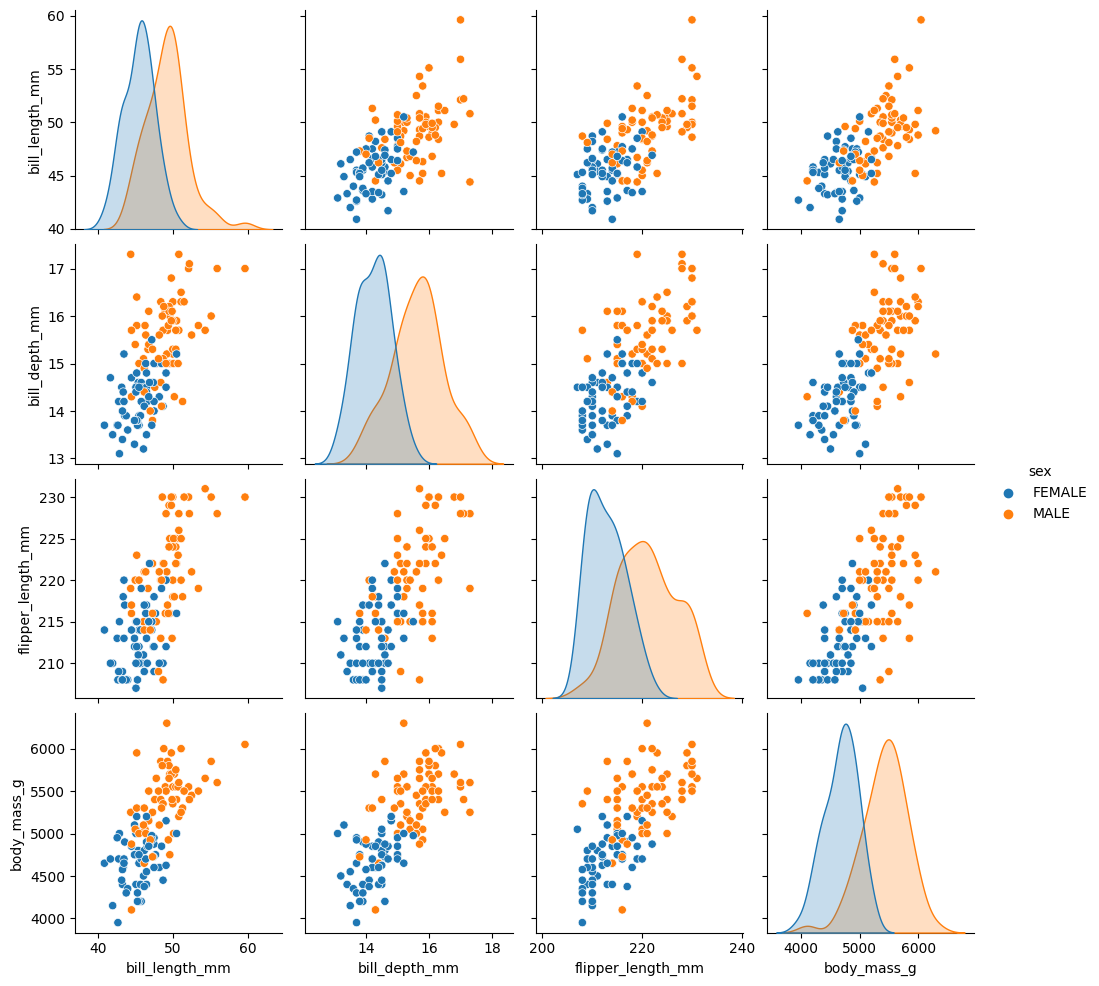

In [ ]:
sb.pairplot(amostra, hue="sex");

Observa-se que a diferença entre as médias da massa para sex = MALE ou sex = FEMALE do conjunto de dados é visivelmente menor que para as médias da variável referente ao comprimento do tronco dos pinguins. Por isso, normalizou-se as variáveis a fim de fazer essa análise.Comparando o comprimento do tronco dos pinguins com a massa deles, tem-se o seguinte:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()

In [ ]:
scaler.fit(np.array(amostra['flipper_length_mm']).reshape(-1, 1))

MinMaxScaler()

In [ ]:
comprimento = scaler.transform(np.array(amostra['flipper_length_mm']).reshape(-1, 1))

In [ ]:
scaler.fit(np.array(amostra['body_mass_g']).reshape(-1, 1))

MinMaxScaler()

In [ ]:
peso = scaler.transform(np.array(amostra['body_mass_g']).reshape(-1, 1))

In [ ]:
amostra2 = amostra.copy()
amostra2['comprimento'] = comprimento
amostra2['peso'] = peso

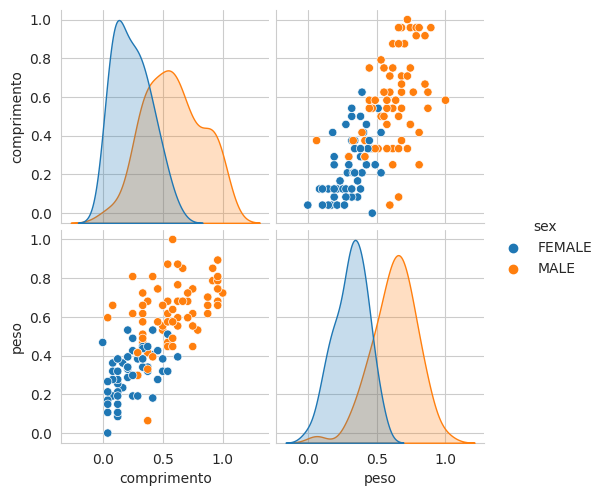

In [ ]:
sb.pairplot(amostra2[['comprimento','peso','sex']], hue="sex");

In [ ]:
print("\n Comprimento médio sex = FEMALE: ",round(amostra2[amostra2['sex']=='FEMALE']['comprimento'].mean(),3))
print("\n Comprimento médio sex = MALE: ",round(amostra2[amostra2['sex']=='MALE']['comprimento'].mean(),3))
print("\n Diferenças médias de comprimentos sex FEMALE e MALE:", 
      round(round(amostra2[amostra2['sex']=='MALE']['comprimento'].mean(),3) - round(amostra2[amostra2['sex']=='FEMALE']['comprimento'].mean(),3),3))
print("\n Peso médio sex = FEMALE: ",round(amostra2[amostra2['sex']=='FEMALE']['peso'].mean(),3))
print("\n Peso médio sex = MALE: ",round(amostra2[amostra2['sex']=='MALE']['peso'].mean(),3))
print("\n Diferenças médias de pesos sex FEMALE e MALE:", 
      round(round(amostra2[amostra2['sex']=='MALE']['peso'].mean(),3) - round(amostra2[amostra2['sex']=='FEMALE']['peso'].mean(),3),3))


 Comprimento médio sex = FEMALE:  0.245

 Comprimento médio sex = MALE:  0.586

 Diferenças médias de comprimentos sex FEMALE e MALE: 0.341

 Peso médio sex = FEMALE:  0.311

 Peso médio sex = MALE:  0.626

 Diferenças médias de pesos sex FEMALE e MALE: 0.315


Embora as variáveis tenham sido normalizadas, a diferença entre as médias dos pesos é um pouco menor que a diferença das alturas, conforme observado anteriormente nos gráficos das distribuições das variáveis. Os gráficos a seguir mostram essas visualizações para as variáveis sem normalização. A linha pontilhada verde representa a média. 

Text(212.37719298245614, 25, 'Média')

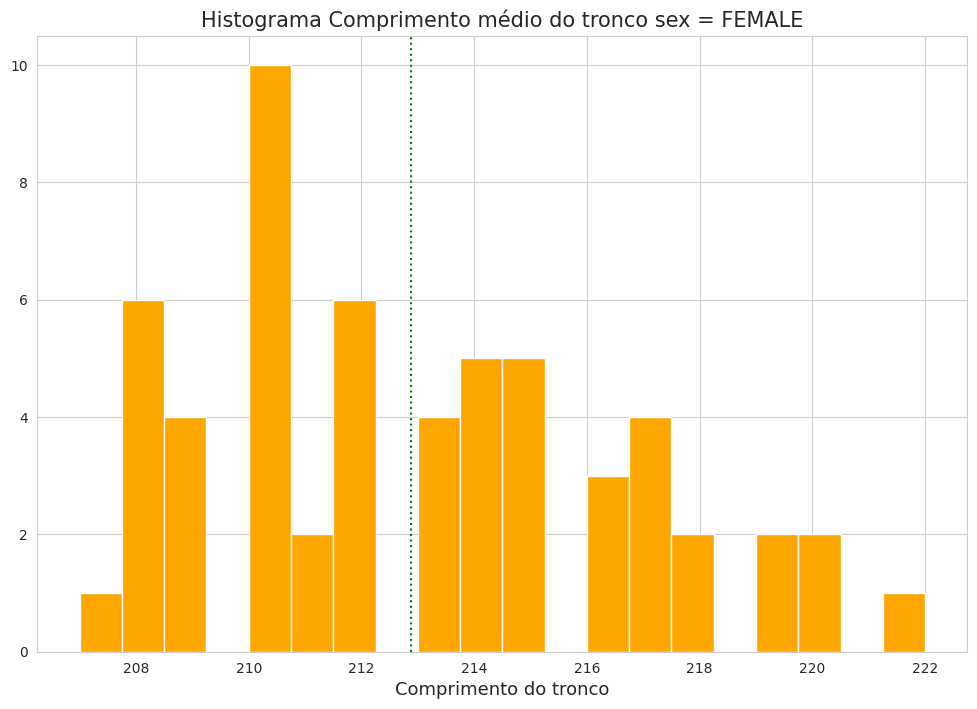

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
mu = amostra2[amostra2['sex']=='FEMALE']['flipper_length_mm'].mean()
sigma = amostra2[amostra2['sex']=='FEMALE']['flipper_length_mm'].std()
mediana = amostra2[amostra2['sex']=='FEMALE']['flipper_length_mm'].median()
ax.hist(x = amostra2[amostra2['sex']=='FEMALE']['flipper_length_mm'], bins=20, color='orange')
ax.grid(True, axis='y')
ax.set_title('Histograma Comprimento médio do tronco sex = FEMALE', fontsize=15)
ax.set_xlabel('Comprimento do tronco', fontsize=13)
ax.annotate(text = f'$ \mu = {mu:.2f}$ \n$ \sigma = {sigma:.2f}$', xy = (5,31), fontsize=15)
ax.axvline(x=mu, color='g', linestyle=':')
ax.annotate(text = f'Média', xy=(mu - 0.5,25), fontsize=15)

Text(220.57575757575756, 25, 'Média')

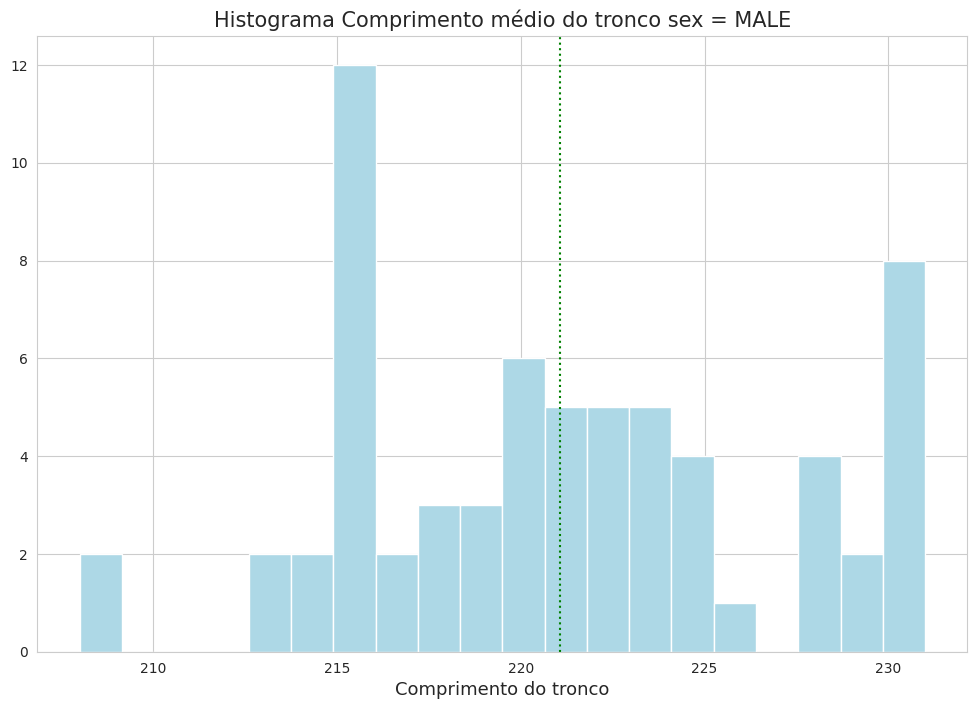

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
mu = amostra2[amostra2['sex']=='MALE']['flipper_length_mm'].mean()
sigma = amostra2[amostra2['sex']=='MALE']['flipper_length_mm'].std()
mediana = amostra2[amostra2['sex']=='MALE']['flipper_length_mm'].median()
ax.hist(x = amostra2[amostra2['sex']=='MALE']['flipper_length_mm'], bins=20, color='lightblue')
ax.grid(True, axis='y')
ax.set_title('Histograma Comprimento médio do tronco sex = MALE', fontsize=15)
ax.set_xlabel('Comprimento do tronco', fontsize=13)
ax.annotate(text = f'$ \mu = {mu:.2f}$ \n$ \sigma = {sigma:.2f}$', xy = (5,31), fontsize=15)
ax.axvline(x=mu, color='g', linestyle=':')
ax.annotate(text = f'Média', xy=(mu - 0.5,25), fontsize=15)

Text(4680.201754385965, 25, 'Média')

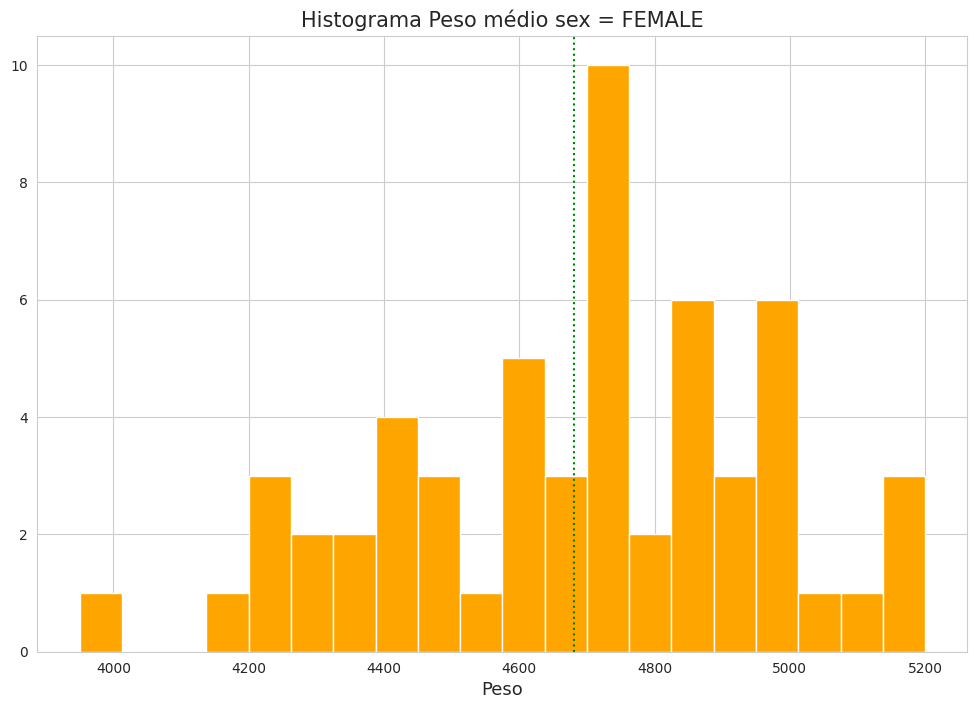

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
mu = amostra2[amostra2['sex']=='FEMALE']['body_mass_g'].mean()
sigma = amostra2[amostra2['sex']=='FEMALE']['body_mass_g'].std()
mediana = amostra2[amostra2['sex']=='FEMALE']['body_mass_g'].median()
ax.hist(x = amostra2[amostra2['sex']=='FEMALE']['body_mass_g'], bins=20, color='orange')
ax.grid(True, axis='y')
ax.set_title('Histograma Peso médio sex = FEMALE', fontsize=15)
ax.set_xlabel('Peso', fontsize=13)
ax.annotate(text = f'$ \mu = {mu:.2f}$ \n$ \sigma = {sigma:.2f}$', xy = (5,31), fontsize=15)
ax.axvline(x=mu, color='g', linestyle=':')
ax.annotate(text = f'Média', xy=(mu - 0.5,25), fontsize=15)

Text(5421.469696969697, 25, 'Média')

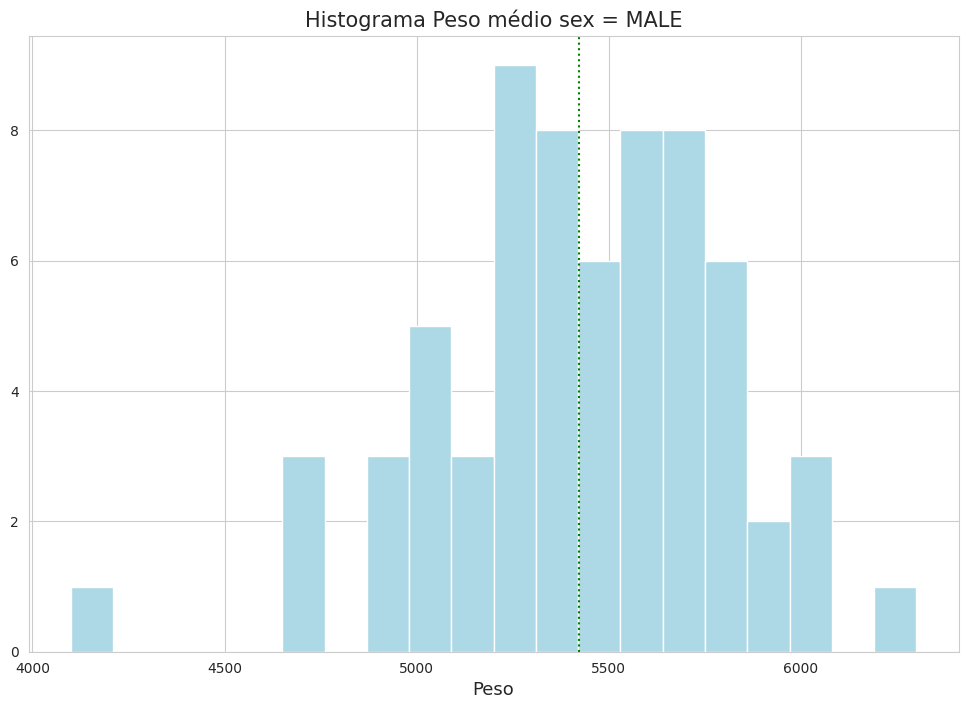

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
mu = amostra2[amostra2['sex']=='MALE']['body_mass_g'].mean()
sigma = amostra2[amostra2['sex']=='MALE']['body_mass_g'].std()
mediana = amostra2[amostra2['sex']=='MALE']['body_mass_g'].median()
ax.hist(x = amostra2[amostra2['sex']=='MALE']['body_mass_g'], bins=20, color='lightblue')
ax.grid(True, axis='y')
ax.set_title('Histograma Peso médio sex = MALE', fontsize=15)
ax.set_xlabel('Peso', fontsize=13)
ax.annotate(text = f'$ \mu = {mu:.2f}$ \n$ \sigma = {sigma:.2f}$', xy = (5,31), fontsize=15)
ax.axvline(x=mu, color='g', linestyle=':')
ax.annotate(text = f'Média', xy=(mu - 0.5,25), fontsize=15)

Por esses gráficos e os valores encontrados no eixo correspondentes ao Peso e comprimento, confirmam-se as análises anteriores. 

# 🎲 Discussões sobre amostras


Após analisar os gráficos anteriores, observou-se os seguintes aspectos sobre a amostra obtida pelo ramo da árvore escolhido:
* Os pinguins da amostra são apenas da ilha Biscoe
* Na amostra apenas existem pinguins da espécie Gentoo
* Existem mais pinguins com sex = MALE do que com sex = FEMALE da espécie Gentoo (specie = Gentoo) na ilha Biscoe (island = Biscoe)
* Os pinguins com specie = Gentoo tem um maior tamanho de tronco e tendem a ser uma espécie que alcança estaturas maiores
* O bico dos pinguins com sex = MALE e specie = Gentoo são um pouco mais longos que os com sex = FEMALE considerando a média das distribuições do comprimento. Contudo, os pinguins com sex = FEMALE apresentam uma uniformidade maior entre os tamanhos dos bicos.  O mesmo comportamento se apresenta em relação a profundidade do bico deles.
* Quanto ao tamanho do tronco dos pinguins, apesar dessa espécie alcançar valores maiores, o tamanho médio para os pinguins o sex = MALE é bem maior que para o FEMALE. Contudo, eles apresentam uma maior variação.
* Quanto à massa dos pinguins, os com sex = MALE apresentam uma média maior que o FEMALE.
* As médias por sexo dos pinguins para as massas estão mais próximas que a média das alturas dos troncos. Esteticamente isto indica que é provável que os pinguins com sex = MALE apresentem uma aparência mais alta e estreita que FEMALE.

